# Data exploration and cleaning
Before we start building machine learning models, we need to understand the data and its characteristics and prepare them for further modeling​. Data visualization is one way to explore a dataset.

Good visualization should be simple and understandable​. To get an idea, take a look at the world data visualization tools provided by the Gapminder foundation:
https://www.gapminder.org/tools/ and watch the TED presentation by its co-founder Hans Rosling: https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen

## Data analysis in Python


In this notebook, we will learn how to use basic exploratory statistics methods in method to analyze a dataset and perform the basic data cleaning operations.


We will use `seaborn` library for data visualization (docs and tutorial: https://seaborn.pydata.org/tutorial.html), `pandas` and `scikit-learn` https://scikit-learn.org/stable/user_guide.html for operations on data.

In [ ]:
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import scale, minmax_scale

## Exploration of the penguins dataset
In this exercise, we will analyze the penguin features dataset described in
https://github.com/allisonhorst/palmerpenguins

### Load the dataset
We load a dataset available in `seaborn`.
The `.head()`  displays first records from the dataset: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
and `.shape` returns the number of rows and columns.

In [ ]:
penguins = sns.load_dataset("penguins")
display(penguins.head())
penguins.shape

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(344, 7)

### Handling missing values

We can see that there are some empty values in the dataset. This may constitue a problem when we want to build models on such data. Let us verify how many missing values there are:

In [ ]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Some columns have a number of missing values. We have several options to handle this issue - for example, we can remove the rows that have nulls (if we think these rows may be corrupted) or we may fill them with some value (for instance, average of the column or a special value). In this case, we will drop the rows with missing values.

In [ ]:
penguins = penguins.dropna()
print(penguins.shape)

(333, 7)


### Calculate descriptive statistics of the dataset
Method `.describe()` calculates basic statistics of numerical columns: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

We can take a look at `mean` and `median` values of each column. Mean is the average value which is sensitice to outliers. For a normal distribution of a continuous variable, the mean and median are equal. If mean>median, the distribution has a positive skew and if median>mean, the skew is negative.

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### How many penguins of each species and sex are in the dataset?

Seaborn `countplot` plots a bar plot with data counts for each category: https://seaborn.pydata.org/generated/seaborn.countplot.html

When you model data for some problem, it is very important that the sample is representative - this means that its distribution should be similar to the distribution of data in real world (for example, the genders and species should have the same proportions as in the whole population).

Moreover, if the sample is too small, the results will not be reliable.

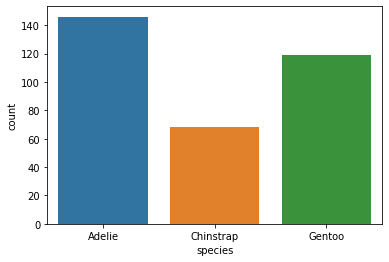

In [ ]:
sns.countplot(data=penguins, x='species')

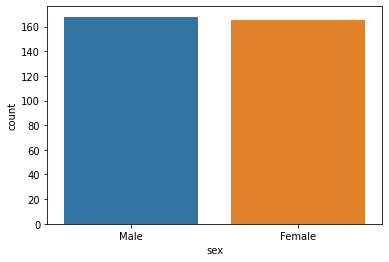

In [ ]:
sns.countplot(data=penguins, x='sex')

### What is the distribution of weight for each species?

Data distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range. A histogram is a visualization of continuous variable distribution​ which shows the number of records that fall into ranges (bins)​.

Seaborn `histplot` plots the histogram of data: https://seaborn.pydata.org/generated/seaborn.histplot.html


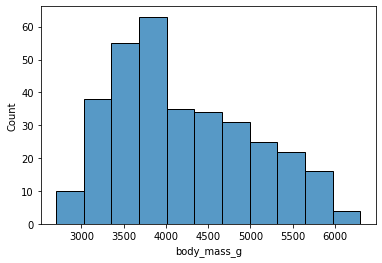

In [ ]:
sns.histplot(data=penguins, x="body_mass_g")

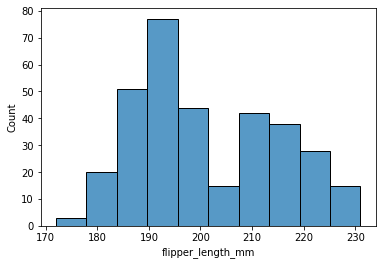

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm")

The `hue` argument splits the plot based on categories of selected column:

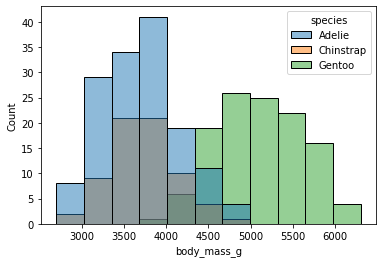

In [ ]:
sns.histplot(data=penguins, x="body_mass_g", hue="species")


### What is the correlation between the penguin features?
Correlation (between -1 and 1) is a measure of the strength of a relationship between two quantitative variables​. A positive correlation means that both variables move in the same direction​ and negative correlation means that one variable increases as the other decreases​. However, we need to keep in minds that correlation does not imply causation - as in this example: https://www.businessinsider.com/chocolate-consumption-vs-nobel-prizes-2014-4?IR=T

For some models, it is beneficial to reduce the number of features and we often do it by removing the correlations between the features.

Pandas `.corr()` method returns the pairwise correlation between each pair of numerical features in the dataset: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html 

Seaborn `heatmap` plots the correlation matrix with the color scale https://seaborn.pydata.org/generated/seaborn.heatmap.html

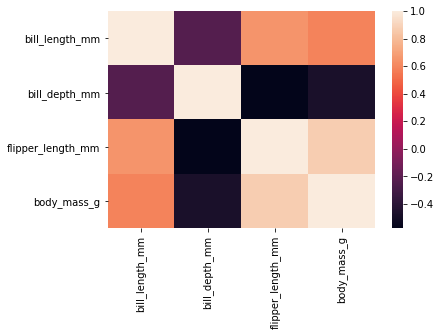

In [ ]:
sns.heatmap(penguins.corr())

A scatterplot displays the relationship between two numerical variables​ and it can be used to visualize correlation​.

We use Seaborn scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

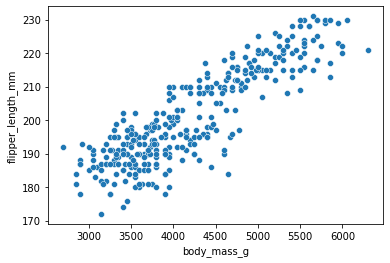

In [ ]:
sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm")

We can also use `regplot` to fit and plot a regression line to these features.

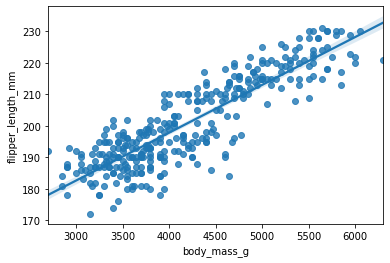

In [ ]:
sns.regplot(data=penguins, x="body_mass_g", y="flipper_length_mm")

We can see that the continues columns in the dataset have different scales. This may constitute another problem for some algorithms since the range of the column may impact the importance of features. 

To avoid this problem, we can scale features to an equal range (eg. to [0,1] by min-max scaling https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)...

Text(0.5, 1.0, 'Minmax scaled body mass')

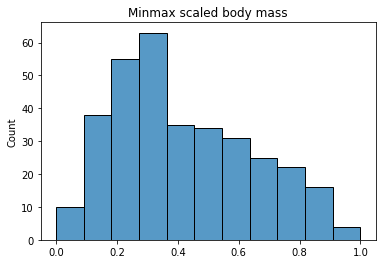

In [ ]:
sns.histplot(data=minmax_scale(penguins['body_mass_g'])).set_title("Minmax scaled body mass")

Text(0.5, 1.0, 'Minmax scaled flipper length')

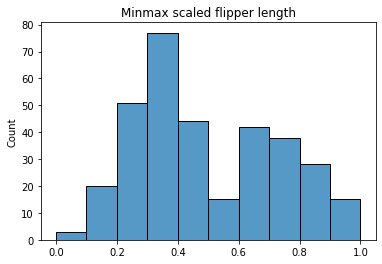

In [ ]:
sns.histplot(data=minmax_scale(penguins['flipper_length_mm'])).set_title("Minmax scaled flipper length")

...or scale them to have zero mean (by standardization https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

Text(0.5, 1.0, 'Standardized body mass')

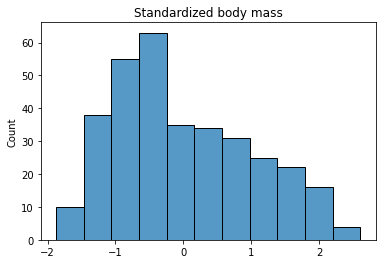

In [ ]:
sns.histplot(data=scale(penguins['body_mass_g'])).set_title("Standardized body mass")

Text(0.5, 1.0, 'Standardized flipper length')

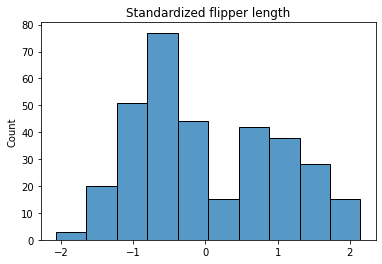

In [ ]:
sns.histplot(data=scale(penguins['flipper_length_mm'])).set_title("Standardized flipper length")

### Encoding categorical variables

Another issue with this dataset is the existence of categorical columns (such as species and sex). For many ML models, the columns need to encoded as numerical values so that further operations may be calculated. 

To encode string values as numbers, we cannot simply map them to ordered numbers - unless these are some ordinal values. Instead, we usually encode them as separate binary columns - we call this process one hot encoding (OHE). We can use OneHotEncoder class from sklearn or `get_dummies` function from `pandas`:

In [ ]:
pd.get_dummies(penguins['species'])

,Adelie,Chinstrap,Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
338,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


## Exploration of the tips dataset
In this task, you will use the same statistical and visualization methods to analyze the reastaurant tips dataset.

Dataset description:
https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

### Load the dataset 
Load the dataset "tips" from seaborn datasets.

In [ ]:
tips = sns.??
tips.head()

### Check if there are any missing values in columns

In [ ]:
tips.??

### What is the average and median of tip value?

Use the `.describe()` method to display the statistics of numerical columns.

In [ ]:
??

### Is the distribution of tips normal or skewed (positively or negatively)? What does it mean?
Plot the histogram for the `"tip"` column on X axis.

In [ ]:
sns.??

### How many observations are there for each day of week? Do you think this dataset is representative for the whole week?
Plot the number of values for categories from the `"day"` column

In [ ]:
sns.??

### Is there any correlation between the total bill and tip? Is it positive or negative?
Use `.corr()` method to plot correlation heatmap between the variables.

In [ ]:
sns.??

Plot the scatterplot of the `"total_bill"` (X axis) and `"tip"` (Y axis).

In [ ]:
sns.??

### Encode `time` column as OHE columns.

In [ ]:
??

## Exploration of Kaggle dataset (optional)

Select one of the datasets from https://www.kaggle.com/datasets, or any other dataset which you find interesting, and perform an exploratory analysis on it.

# What to remember
* It is important to analyze the characteristics of the dataset before you start modeling it.
* You should verify what types of columns there are and how many missing or unexpected values they have.
* Some useful dataset statistics are mean and median. 
* It is also good to compare the number of examples in each category and check if the dataset is representative for the population.
* A histogram plots the distribution of a continuous variable (eg. height of penguins). 
* A scatter plot visualizes the correlation between numerical variables(eg. height vs. weight). A correlation coefficient tells if the correlation is positive or negative.